In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(60.6791044736498, -57.56874368498568),
 (-18.064704915048083, -19.878711453461108),
 (-89.24506551913996, -172.63478855815612),
 (-45.32999927209664, 108.12363083284242),
 (-66.817149526212, 66.521010689527),
 (76.64885701690582, 124.92072826421446),
 (82.76522260787385, 158.10084429247036),
 (67.82156190074835, -82.23226716351358),
 (32.82298813129367, -110.25080005238479),
 (-85.34403482285205, 152.37430756627543),
 (1.6628017356910902, 146.68231610473498),
 (43.46292582025853, -119.51248360626232),
 (27.430483347628325, 119.67252807564887),
 (-2.237619225564231, 41.972941011431715),
 (-1.7140754973613639, 95.66349587530198),
 (78.3236479360977, 42.46677419993958),
 (49.810709455177374, -102.202329797838),
 (-23.524164967676214, 116.53392644054065),
 (18.45945122785713, -75.63327433722111),
 (10.28435765368799, -68.9606264711257),
 (-51.33743681298879, 124.20261824261246),
 (17.457350171736067, -41.277596090236614),
 (86.17572699095874, -167.99051709966437),
 (-56.46074138216835, 5

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

60.6791044736498 -57.56874368498568
-18.064704915048083 -19.878711453461108
-89.24506551913996 -172.63478855815612
-45.32999927209664 108.12363083284242
-66.817149526212 66.521010689527
76.64885701690582 124.92072826421446
82.76522260787385 158.10084429247036
67.82156190074835 -82.23226716351358
32.82298813129367 -110.25080005238479
-85.34403482285205 152.37430756627543
1.6628017356910902 146.68231610473498
43.46292582025853 -119.51248360626232
27.430483347628325 119.67252807564887
-2.237619225564231 41.972941011431715
-1.7140754973613639 95.66349587530198
78.3236479360977 42.46677419993958
49.810709455177374 -102.202329797838
-23.524164967676214 116.53392644054065
18.45945122785713 -75.63327433722111
10.28435765368799 -68.9606264711257
-51.33743681298879 124.20261824261246
17.457350171736067 -41.277596090236614
86.17572699095874 -167.99051709966437
-56.46074138216835 54.20100303220681
-21.309720385368294 -178.67690929202337
88.94128170873898 -120.44953978240318
38.28614550716475 173.0

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
# Import the requests library
import requests
# Import the API key
from config import weather_api_key
# Generate the starting URL for the Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-"*30)

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
#for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes
    #if (i % 50 == 0 and i >= 50):
    #    set_count += 1
    #    record_count = 1
    #    time.sleep(60)
    # Create endpoint URL with each city
    #city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found; Skipping...")
        pass

# Indicate that Data Loading is complete
print("-"*30)
print("Data Retrieval Complete      ")
print("-"*30)

Beginning Data Retrieval     
------------------------------
Processing Record 1 of Set 1 | maniitsoq
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | taolanaro
City not found; Skipping...
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | cherskiy
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | safford
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | lorengau
Processing Record 12 of Set 1 | redmond
Processing Record 13 of Set 1 | hanyang
Processing Record 14 of Set 1 | bur gabo
City not found; Skipping...
Processing Record 15 of Set 1 | sibolga
Processing Record 16 of Set 1 | ostrovnoy
Processing Record 17 of Set 1 | carlyle
Processing Record 18 of Set 1 | karratha
Processing Record 19 of Set 1 | port antonio
Processing Record 20 of Set 1 | chivacoa
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | po

Processing Record 38 of Set 4 | belushya guba
City not found; Skipping...
Processing Record 39 of Set 4 | jamestown
Processing Record 40 of Set 4 | te anau
Processing Record 41 of Set 4 | san patricio
Processing Record 42 of Set 4 | mahon
Processing Record 43 of Set 4 | porto walter
Processing Record 44 of Set 4 | komsomolskiy
Processing Record 45 of Set 4 | bonavista
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | el balyana
City not found; Skipping...
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | songjianghe
Processing Record 50 of Set 4 | tromso
Processing Record 1 of Set 5 | san carlos de bariloche
Processing Record 2 of Set 5 | kamachumu
Processing Record 3 of Set 5 | livramento
Processing Record 4 of Set 5 | picos
Processing Record 5 of Set 5 | nizhnevartovsk
Processing Record 6 of Set 5 | coahuayana
Processing Record 7 of Set 5 | lata
Processing Record 8 of Set 5 | pombia
Processing Record 9 of Set 5 | port augusta
Processing

Processing Record 26 of Set 8 | alekseyevsk
Processing Record 27 of Set 8 | forestville
Processing Record 28 of Set 8 | lieksa
Processing Record 29 of Set 8 | goderich
Processing Record 30 of Set 8 | honiara
Processing Record 31 of Set 8 | surt
Processing Record 32 of Set 8 | thinadhoo
Processing Record 33 of Set 8 | attawapiskat
City not found; Skipping...
Processing Record 34 of Set 8 | walvis bay
Processing Record 35 of Set 8 | petropavl
Processing Record 36 of Set 8 | kahului
Processing Record 37 of Set 8 | jose bonifacio
Processing Record 38 of Set 8 | narasannapeta
Processing Record 39 of Set 8 | omsk
Processing Record 40 of Set 8 | porgera
Processing Record 41 of Set 8 | nanortalik
Processing Record 42 of Set 8 | wagar
Processing Record 43 of Set 8 | cabo san lucas
Processing Record 44 of Set 8 | port hedland
Processing Record 45 of Set 8 | mosquera
Processing Record 46 of Set 8 | kasrawad
Processing Record 47 of Set 8 | babanusah
City not found; Skipping...
Processing Record 48

Processing Record 13 of Set 12 | hammerfest
Processing Record 14 of Set 12 | dharchula
Processing Record 15 of Set 12 | lidkoping
Processing Record 16 of Set 12 | ust-barguzin
Processing Record 17 of Set 12 | byron bay
Processing Record 18 of Set 12 | gombe
Processing Record 19 of Set 12 | leningradskiy
Processing Record 20 of Set 12 | krasnoye
Processing Record 21 of Set 12 | jiblah
Processing Record 22 of Set 12 | itagiba
Processing Record 23 of Set 12 | agva
City not found; Skipping...
Processing Record 24 of Set 12 | rio muerto
Processing Record 25 of Set 12 | mossendjo
Processing Record 26 of Set 12 | bay-khaak
Processing Record 27 of Set 12 | grajau
Processing Record 28 of Set 12 | havelock
Processing Record 29 of Set 12 | badajoz
Processing Record 30 of Set 12 | meulaboh
Processing Record 31 of Set 12 | yanam
Processing Record 32 of Set 12 | williston
Processing Record 33 of Set 12 | mikuni
Processing Record 34 of Set 12 | mitu
Processing Record 35 of Set 12 | springbok
Processi

In [9]:
len(city_data)

573

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maniitsoq,65.4167,-52.9000,22.66,59,100,7.90,GL,2022-11-11 14:41:15
1,Georgetown,5.4112,100.3354,76.95,97,40,4.61,MY,2022-11-11 14:41:16
2,Vaini,-21.2000,-175.2000,77.16,94,40,2.30,TO,2022-11-11 14:41:17
3,Busselton,-33.6500,115.3333,51.08,78,41,6.96,AU,2022-11-11 14:39:01
4,Tiksi,71.6872,128.8694,-11.47,100,98,2.66,RU,2022-11-11 14:41:18
5,Cherskiy,68.7500,161.3000,-23.26,100,99,3.22,RU,2022-11-11 14:41:19
6,Clyde River,70.4692,-68.5914,-1.97,78,100,10.36,CA,2022-11-11 14:41:20
7,Safford,32.8340,-109.7076,52.11,80,0,3.44,US,2022-11-11 14:41:20
8,Bluff,-46.6000,168.3333,53.22,84,100,4.12,NZ,2022-11-11 14:41:21
9,Lorengau,-2.0226,147.2712,81.27,76,100,2.64,PG,2022-11-11 14:41:21


In [11]:
new_city_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_city_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maniitsoq,GL,2022-11-11 14:41:15,65.4167,-52.9000,22.66,59,100,7.90
1,Georgetown,MY,2022-11-11 14:41:16,5.4112,100.3354,76.95,97,40,4.61
2,Vaini,TO,2022-11-11 14:41:17,-21.2000,-175.2000,77.16,94,40,2.30
3,Busselton,AU,2022-11-11 14:39:01,-33.6500,115.3333,51.08,78,41,6.96
4,Tiksi,RU,2022-11-11 14:41:18,71.6872,128.8694,-11.47,100,98,2.66
5,Cherskiy,RU,2022-11-11 14:41:19,68.7500,161.3000,-23.26,100,99,3.22
6,Clyde River,CA,2022-11-11 14:41:20,70.4692,-68.5914,-1.97,78,100,10.36
7,Safford,US,2022-11-11 14:41:20,32.8340,-109.7076,52.11,80,0,3.44
8,Bluff,NZ,2022-11-11 14:41:21,-46.6000,168.3333,53.22,84,100,4.12
9,Lorengau,PG,2022-11-11 14:41:21,-2.0226,147.2712,81.27,76,100,2.64


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

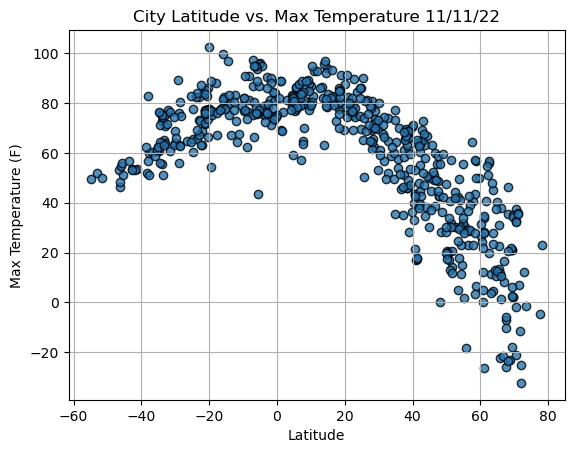

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

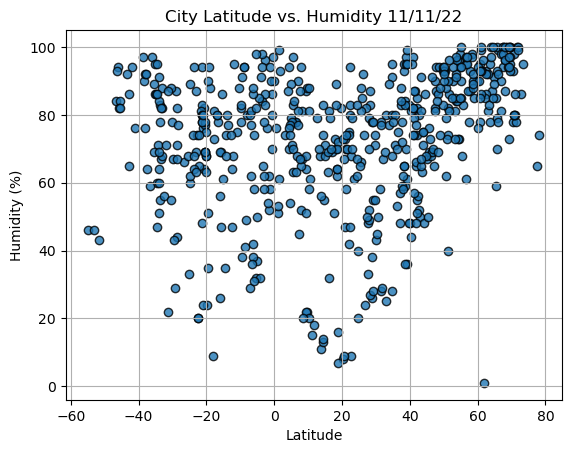

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

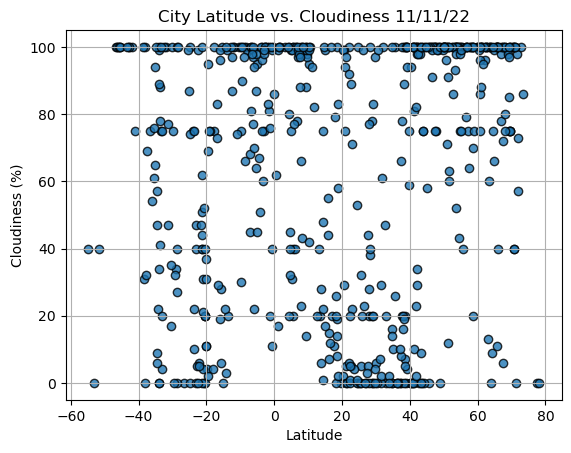

In [16]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

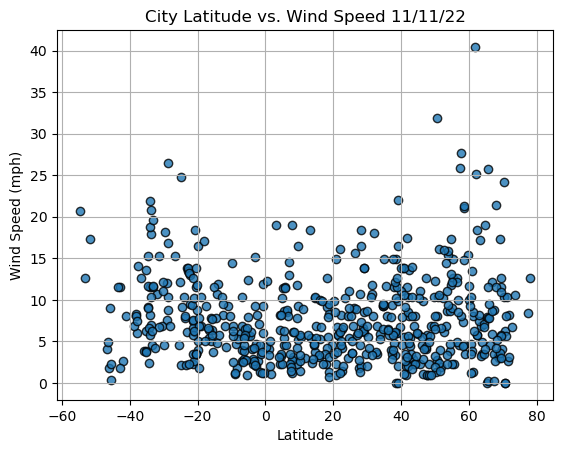

In [17]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linear regression from the SciPy stats module
from scipy.stats import linregress

In [36]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

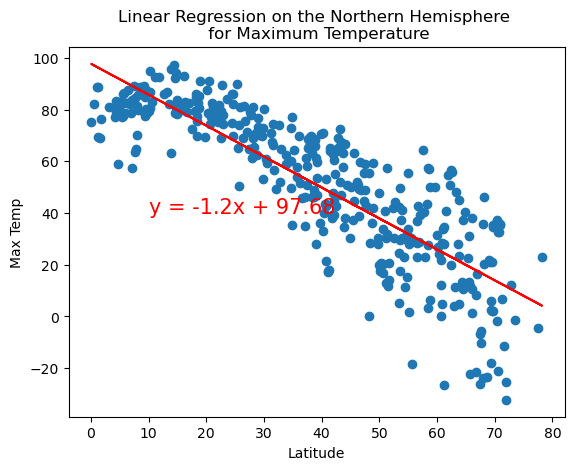

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


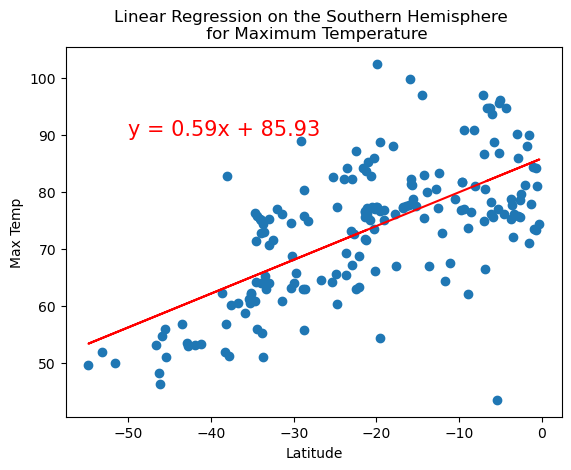

In [44]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


In [ ]:
# The correlation between the latitude and the maximum temperature is 
# strong to very strong because the r-value is clsoe to –1.0 for the 
# Northern Hemisphere and close to 1.0 for the Southern Hemisphere, 
# as shown by the plots here. This means that as we approach the equator, 
# 0° latitude, the temperatures become warmer. And when we are further 
# from the equator the temperatures become cooler. Check the r-values for 
# your plots. 

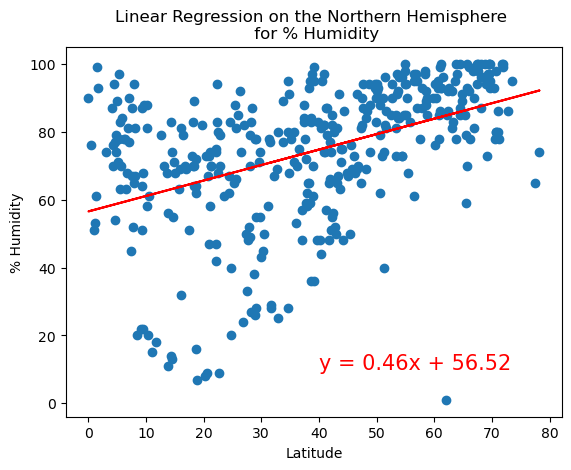

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

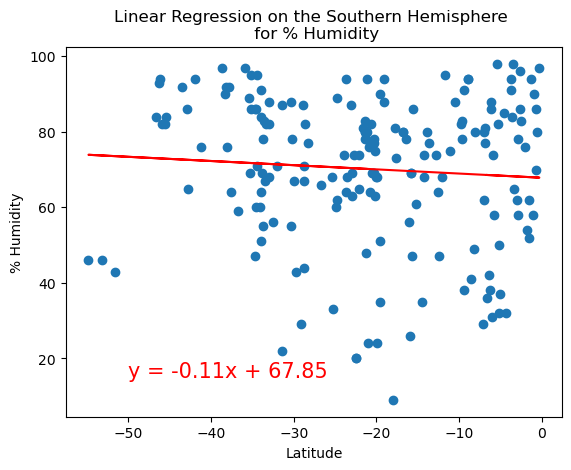

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [ ]:
# The correlation between the latitude and percent humidity is very low 
# because the r-value is closer to 0.0 for both Hemispheres for the plots 
# shown here. This means that percent humidity is unpredictable due to 
# changing weather patterns that can increase or decrease percent humidity.  

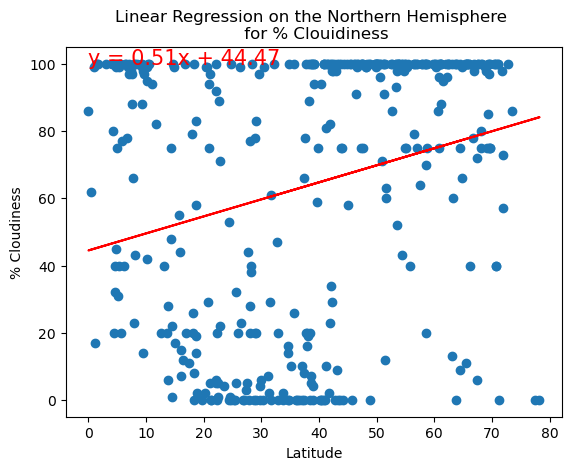

In [53]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Clouidiness', '% Cloudiness',(0,100))

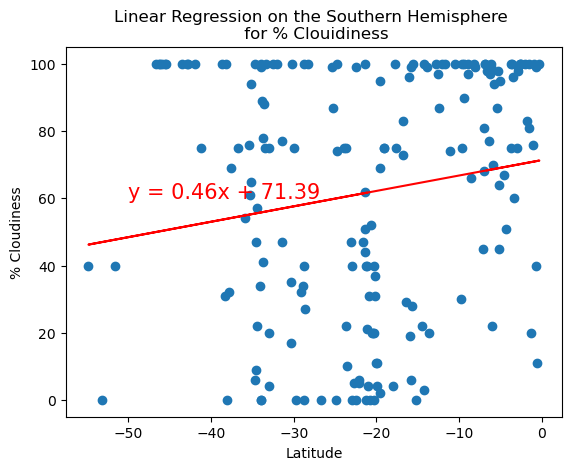

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Clouidiness', '% Cloudiness',(-50,60))

In [ ]:
# The correlation between the latitude and percent cloudiness is trending 
# positive for both Hemispheres, meaning as latitude increases or decreases, 
# so does cloud cover. 

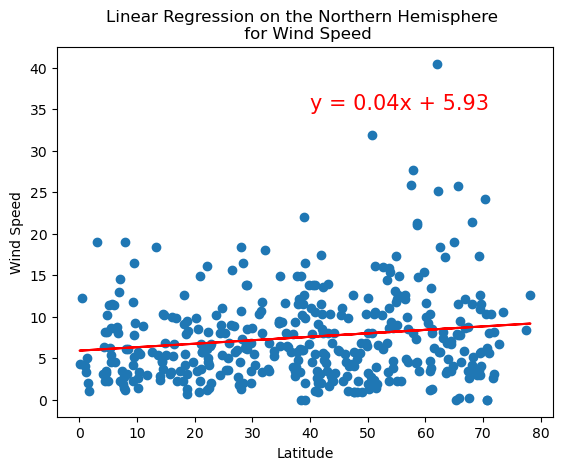

In [57]:
# Linear regression on the Northern Hemisphere, Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

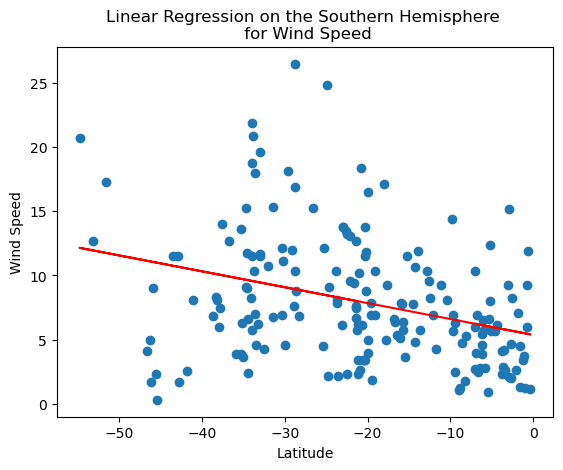

In [58]:
# Linear regression on the Southern Hemisphere, Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))